<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [19]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [38]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [21]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [22]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


##### TASK 1: Familiarize yourself with the dataset

In [ ]:
"""Lookup:
      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's
"""

"Lookup:\n      CRIM - per capita crime rate by town\n\n·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\n\n·      INDUS - proportion of non-retail business acres per town.\n\n·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\n\n·      NOX - nitric oxides concentration (parts per 10 million)\n\n·      RM - average number of rooms per dwelling\n\n·      AGE - proportion of owner-occupied units built prior to 1940\n\n·      DIS - weighted distances to five Boston employment centres\n\n·      RAD - index of accessibility to radial highways\n\n·      TAX - full-value property-tax rate per $10,000\n\n·      PTRATIO - pupil-teacher ratio by town\n\n·      LSTAT - % lower status of the population\n\n·      MEDV - Median value of owner-occupied homes in $1000's\n"

In [24]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [25]:
#using this in order to see if my plots match
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


##### TASK 2: Generate Descriptive Statistics and Visualizations

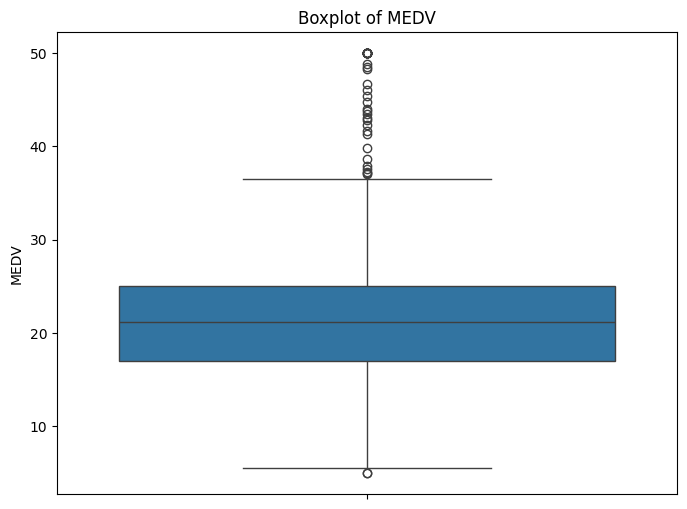

In [ ]:
# 1. Boxplot for the "Median value of owner-occupied homes" (MEDV)
pyplot.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of MEDV')
pyplot.show()

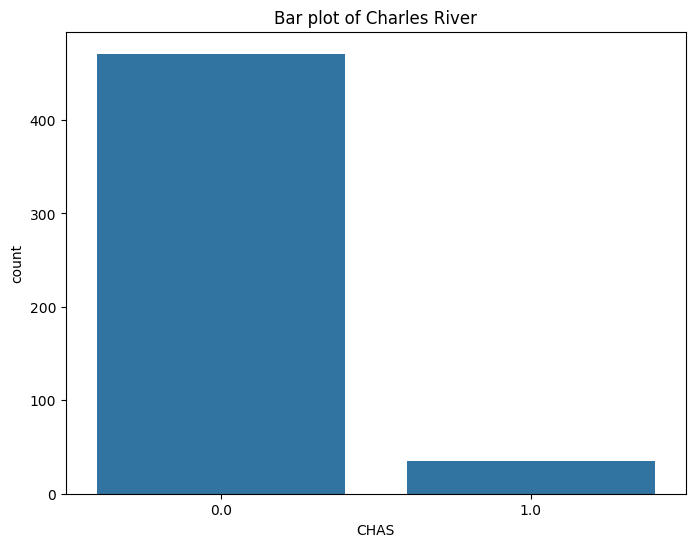

In [29]:
# 2. Bar plot for the Charles River variable
pyplot.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Bar plot of Charles River')
pyplot.show()

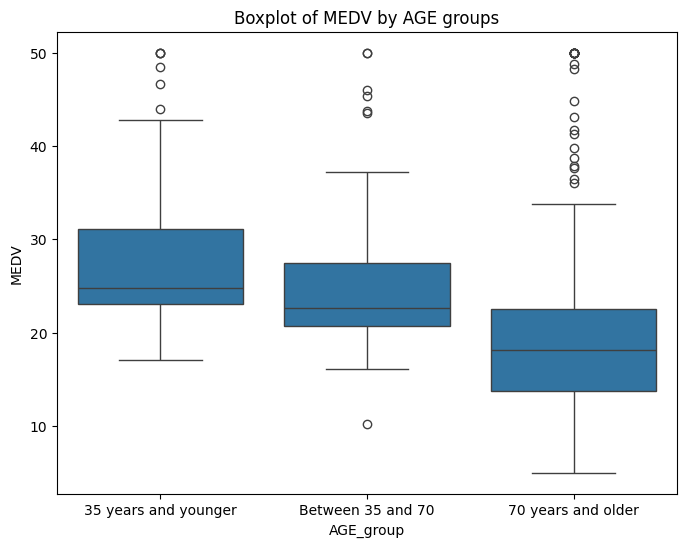

In [33]:
# 3. Boxplot for MEDV vs. discretized AGE groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'Between 35 and 70', '70 years and older'])
pyplot.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])
pyplot.title('Boxplot of MEDV by AGE groups')
pyplot.show()

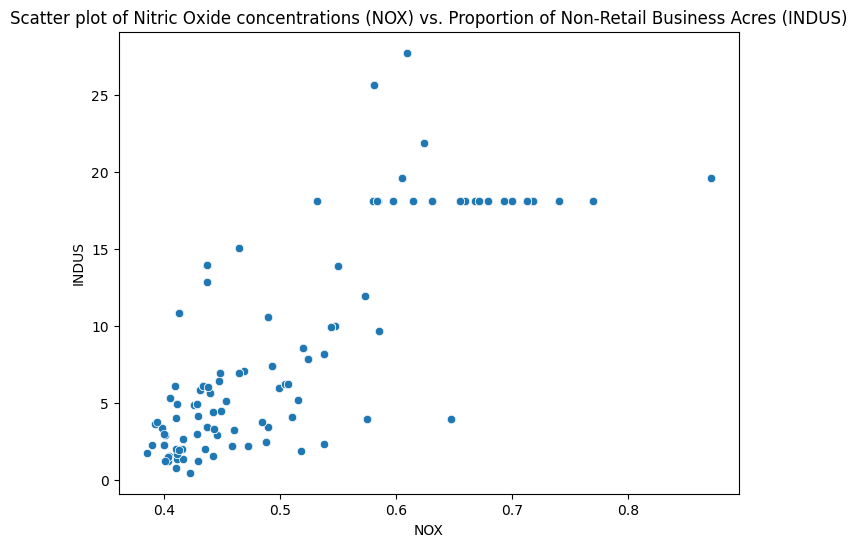

In [34]:
# 4. Scatter plot to show the relationship between NOX and INDUS
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
pyplot.title('Scatter plot of Nitric Oxide concentrations (NOX) vs. Proportion of Non-Retail Business Acres (INDUS)')
pyplot.xlabel('NOX')
pyplot.ylabel('INDUS')
pyplot.show()

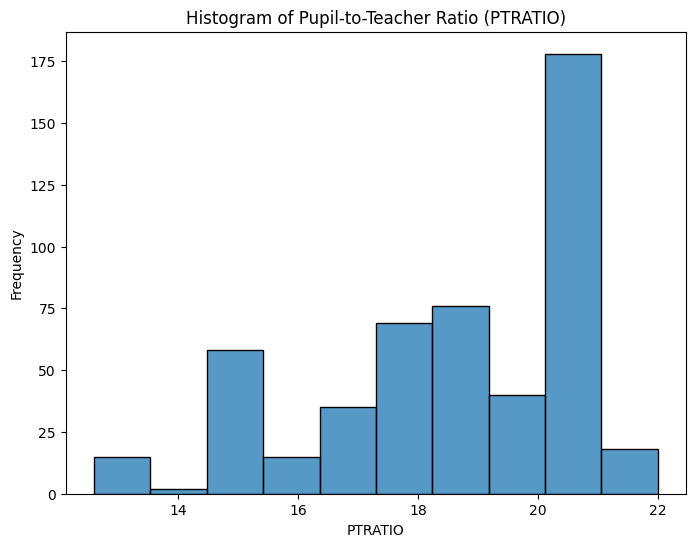

In [35]:
# 5. Histogram for the pupil-to-teacher ratio (PTRATIO)
pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=False)
pyplot.title('Histogram of Pupil-to-Teacher Ratio (PTRATIO)')
pyplot.xlabel('PTRATIO')
pyplot.ylabel('Frequency')
pyplot.show()

##### TASK 3: Use the appropriate tests to answer the questions provided

In [41]:
#Is there a significant difference in the median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Split the data into two groups: houses near Charles River and those that are not
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test for independent samples
t_stat, p_value = stats.ttest_ind(chas_1, chas_0)

# Significance level
alpha = 0.05

if p_value < alpha:
    print(f"reject the H0 because {p_value} is lower than {alpha}")
else:
    print("H0 can not be rejected")

reject the H0 because 7.390623170519905e-05 is lower than 0.05


In [43]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
anova_result = stats.f_oneway(
    boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['AGE_group'] == 'Between 35 and 70']['MEDV'],
    boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']
)

if anova_result.pvalue < alpha:
    print(f"reject the H0 because {anova_result.pvalue} is lower than {alpha}")
else:
    print("H0 can not be rejected")    

reject the H0 because 1.7105011022702984e-15 is lower than 0.05


In [49]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
corr_coef, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

if p_value < alpha:
    print(f"reject the H0 because {p_value} is lower than {alpha}")
else:
    print("H0 can not be rejected")

reject the H0 because 7.913361061210442e-98 is lower than 0.05


In [48]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

if model.pvalues[1] < alpha:
    print(f"reject the H0 because {model.pvalues[1]} is lower than {alpha}")
else:
    print("H0 can not be rejected")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        17:45:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<ipython-input-48-5b5f99a3a863>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.pvalues[1] < alpha:
<ipython-input-48-5b5f99a3a863>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"reject the H0 because {model.pvalues[1]} is lower than {alpha}")


reject the H0 because 1.2066117273372235e-08 is lower than 0.05
